<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [28]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-29 05:07:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  34.9MB/s    in 1.0s    

2024-10-29 05:07:47 (34.9 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [29]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Demo: How to run an sql query


In [31]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [32]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


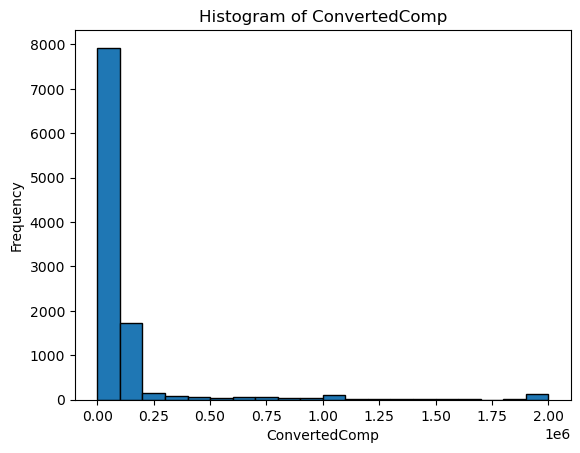

In [8]:
# Query to get the data
QUERY = """
SELECT ConvertedComp FROM master"""

df = pd.read_sql_query(QUERY,conn)

# Plot the histogram
plt.hist(df['ConvertedComp'], bins=20, edgecolor='black')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


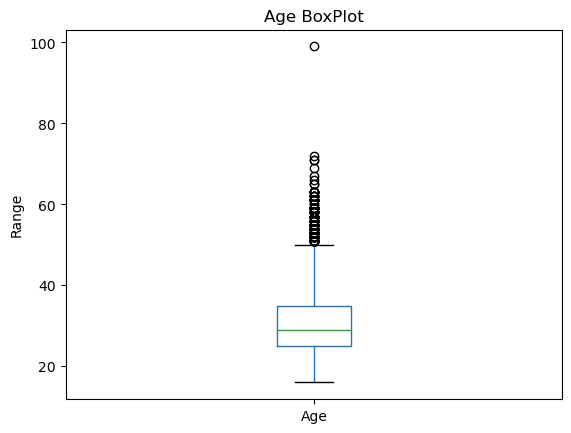

In [9]:
# your code goes here
QUERY = """
SELECT * FROM master"""

df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age', grid=False)
plt.ylabel('Range')
plt.title('Age BoxPlot')
plt.show()

Text(0.5, 1.0, 'Age BoxPlot')

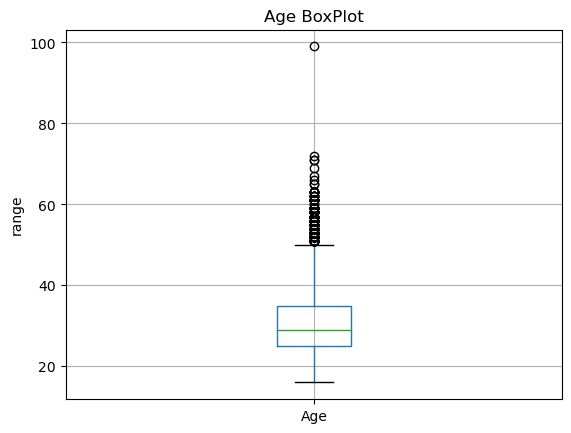

In [10]:
# your code goes here
QUERY = """
SELECT * FROM master"""

df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')
plt.ylabel('range')
plt.title('Age BoxPlot')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


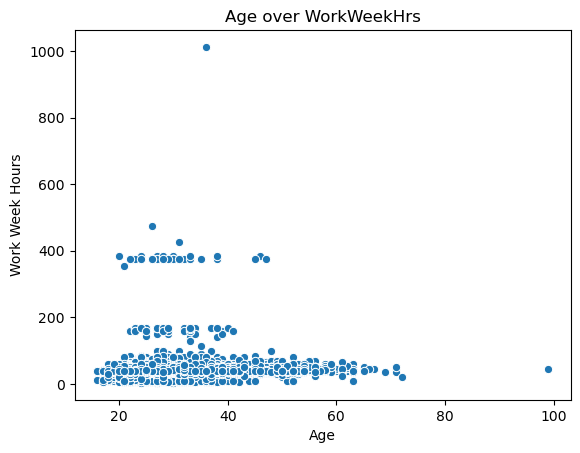

In [11]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs FROM master"""

df = pd.read_sql_query(QUERY,conn)
plot=sns.scatterplot(x=df['Age'],y=df['WorkWeekHrs'])
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Age over WorkWeekHrs')
plt.show()

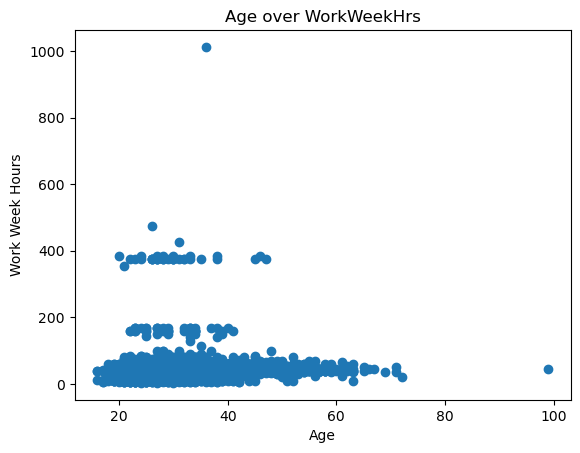

In [13]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs FROM master"""

df = pd.read_sql_query(QUERY,conn)
plt.scatter(df['Age'],df['WorkWeekHrs'], alpha=1)
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Age over WorkWeekHrs')
plt.show()

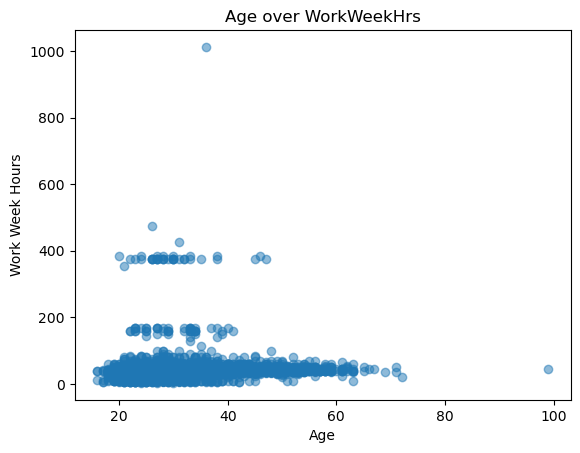

In [12]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs FROM master"""

df = pd.read_sql_query(QUERY,conn)
plt.scatter(df['Age'],df['WorkWeekHrs'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Age over WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


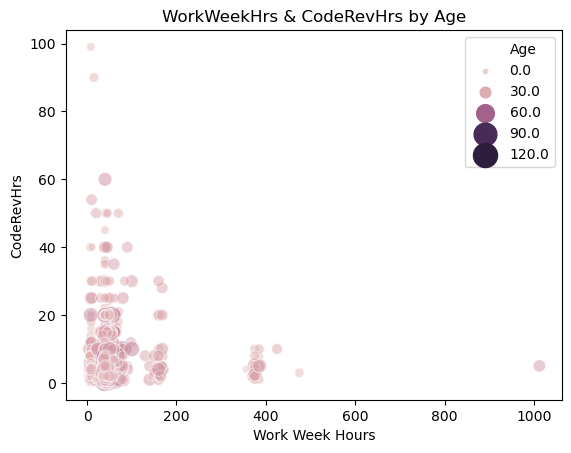

In [13]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"""

df = pd.read_sql_query(QUERY,conn)

plot=sns.scatterplot(data=df, y='CodeRevHrs',x='WorkWeekHrs',size='Age', hue='Age', alpha=0.5, sizes=(10,300))
plt.ylabel('CodeRevHrs')
plt.xlabel('Work Week Hours')
plt.title('WorkWeekHrs & CodeRevHrs by Age')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


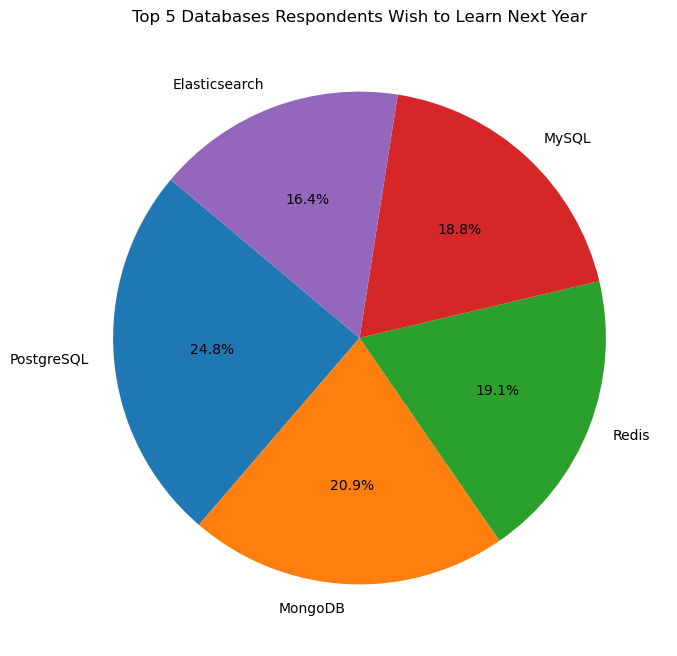

In [33]:
# your code goes here

# Query to get the data
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

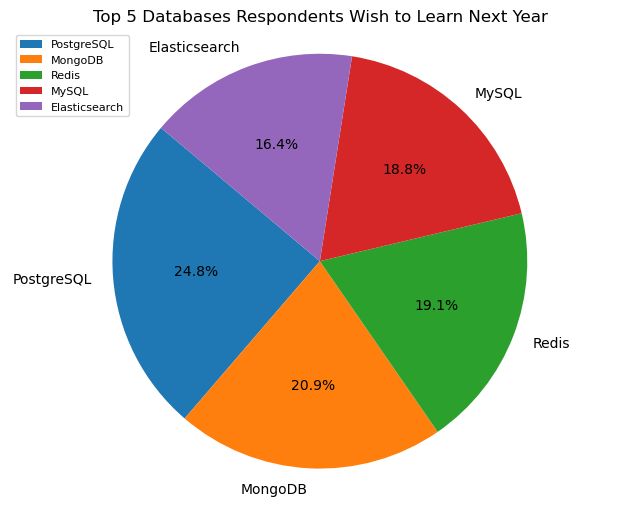

In [15]:
# your code goes here

# Query to get the data
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.legend(loc='upper left', fontsize=8)
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


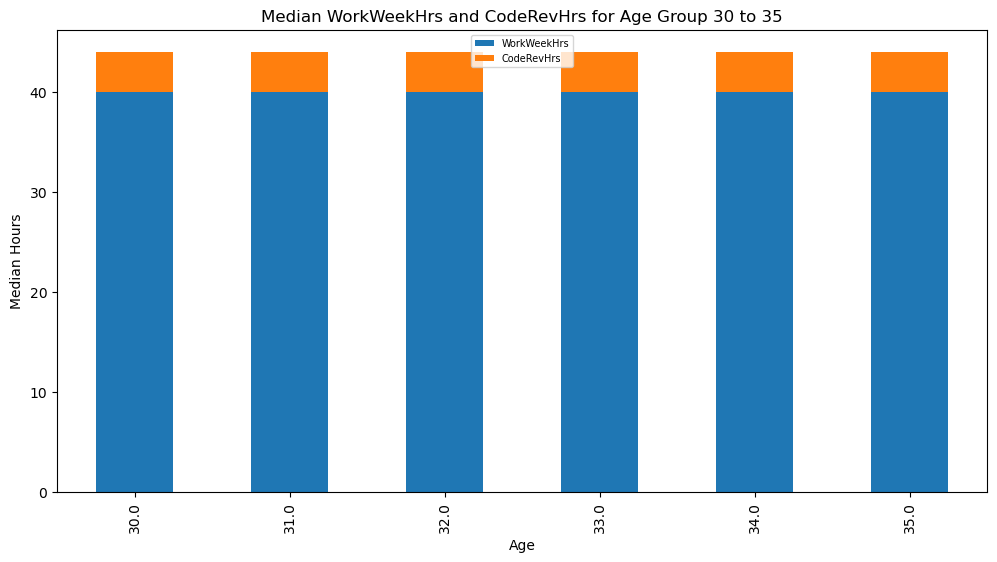

In [16]:
# your code goes here

# Query to get the data
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)

# Calculate the median values
median_values = df.groupby('Age').median()

# Plot the stacked bar chart
median_values.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='upper center', fontsize=7)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


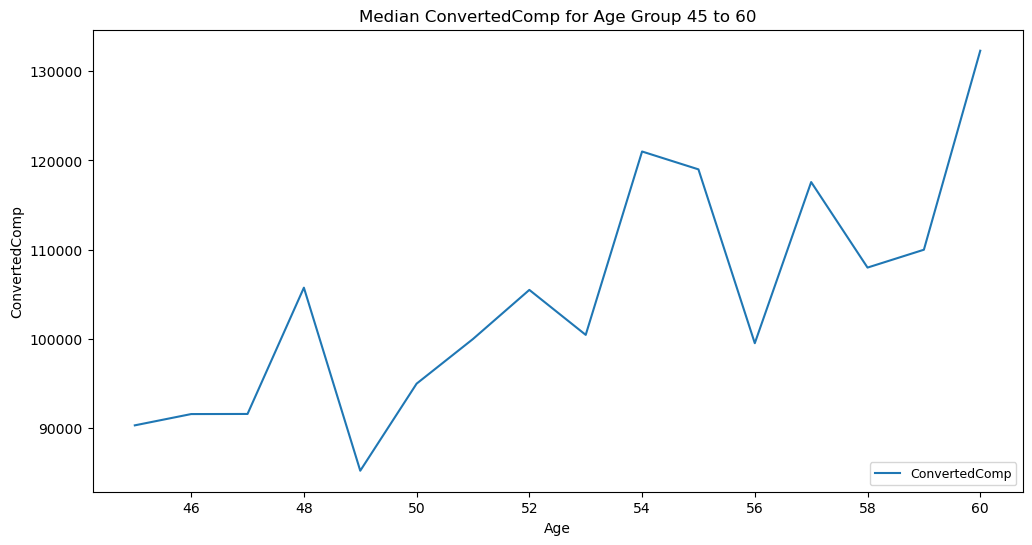

In [17]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)

# Calculate the median values
median_values = df.groupby('Age').median()

# Plot the stacked bar chart
median_values.plot(kind='line', figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.title('Median ConvertedComp for Age Group 45 to 60')
plt.legend(loc='lower right', fontsize=9)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Figure size 1000x600 with 0 Axes>

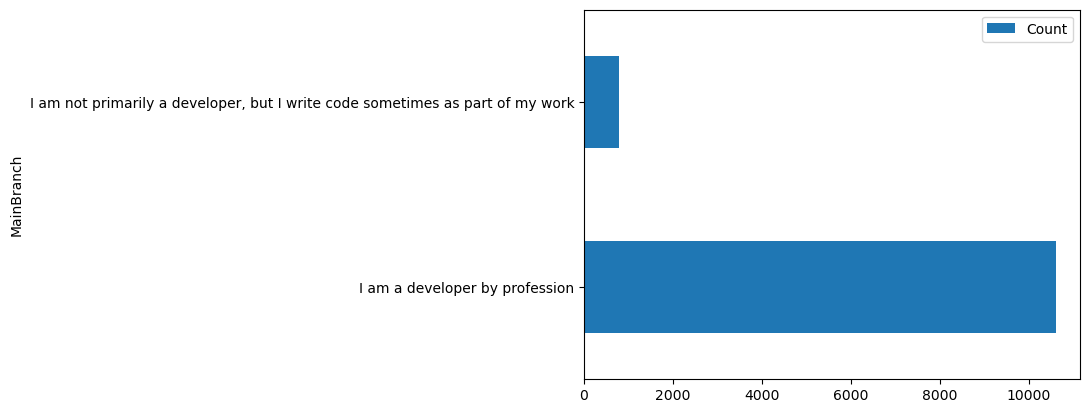

In [18]:
# Query to get the data
QUERY = "SELECT MainBranch, COUNT(*) as Count FROM master GROUP BY MainBranch"
df = pd.read_sql_query(QUERY,conn)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='barh', x='MainBranch', y='Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

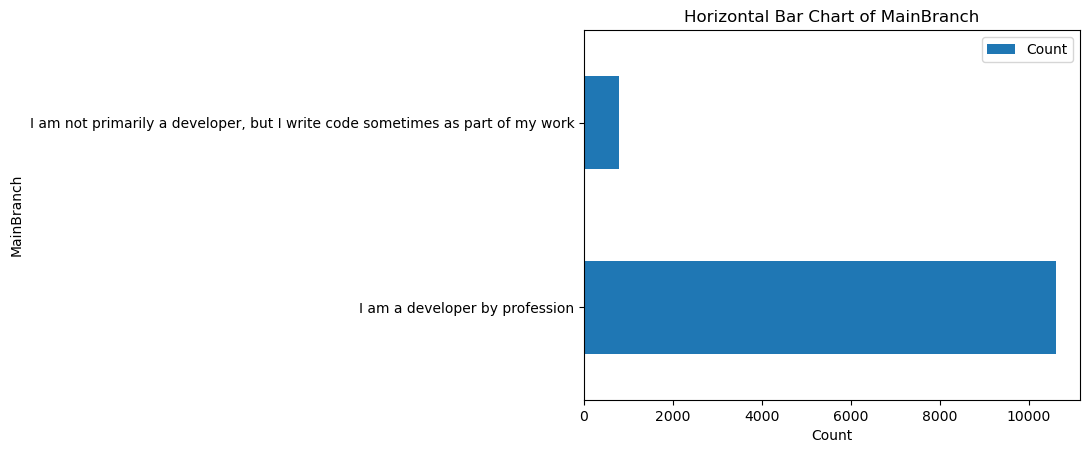

In [19]:
# Query to get the data
QUERY = "SELECT MainBranch, COUNT(*) as Count FROM master GROUP BY MainBranch"
df = pd.read_sql_query(QUERY,conn)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='barh', x='MainBranch', y='Count', legend=False)
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Horizontal Bar Chart of MainBranch')
plt.legend()
plt.show()

Close the database connection.


In [69]:
df.corr()

,Count
Count,1.0


In [71]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) as Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Count DESC
"""
print( pd.read_sql_query(QUERY,conn))

       LanguageWorkedWith  Count
0              JavaScript   8687
1                HTML/CSS   7830
2                     SQL   7106
3   Bash/Shell/PowerShell   4642
4                  Python   4542
5                    Java   4506
6                      C#   4288
7              TypeScript   3232
8                     PHP   2913
9                     C++   1946
10                      C   1578
11                   Ruby   1149
12                     Go   1114
13              Other(s):    840
14                 Kotlin    751
15                  Swift    707
16                    VBA    628
17                      R    585
18            Objective-C    518
19                  Scala    492
20               Assembly    437
21                   Rust    324
22                   Dart    237
23                 Elixir    187
24                Clojure    164
25                     F#    158
26            WebAssembly    133
27                 Erlang     98


In [70]:
QUERY = """
SELECT DatabaseWorkedWith, COUNT(*) as Count
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY Count DESC
"""
print( pd.read_sql_query(QUERY,conn))

      DatabaseWorkedWith  Count
0                  MySQL   5469
1   Microsoft SQL Server   4110
2             PostgreSQL   4097
3                 SQLite   3248
4                MongoDB   3016
5                  Redis   2508
6          Elasticsearch   1954
7                 Oracle   1744
8                MariaDB   1709
9               Firebase   1314
10              DynamoDB    831
11             Other(s):    728
12             Cassandra    397
13             Couchbase    250


In [59]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""
print ( pd.read_sql_query(QUERY,conn)

   LanguageDesireNextYear  Count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149


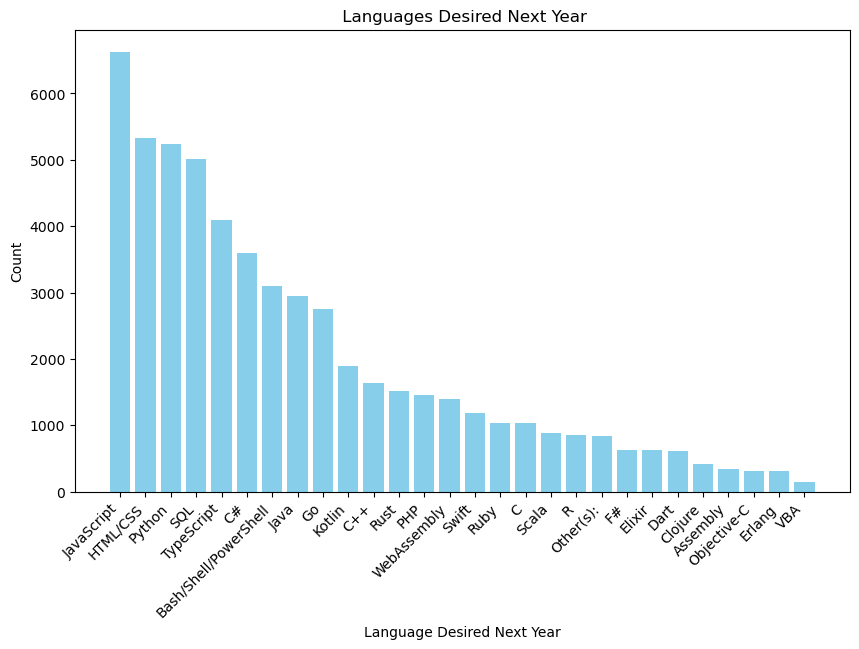

In [58]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY,conn)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['LanguageDesireNextYear'], df['Count'], color='skyblue')
plt.xlabel('Language Desired Next Year')
plt.ylabel('Count')
plt.title(' Languages Desired Next Year')
plt.xticks(rotation=45, ha='right')
plt.show()

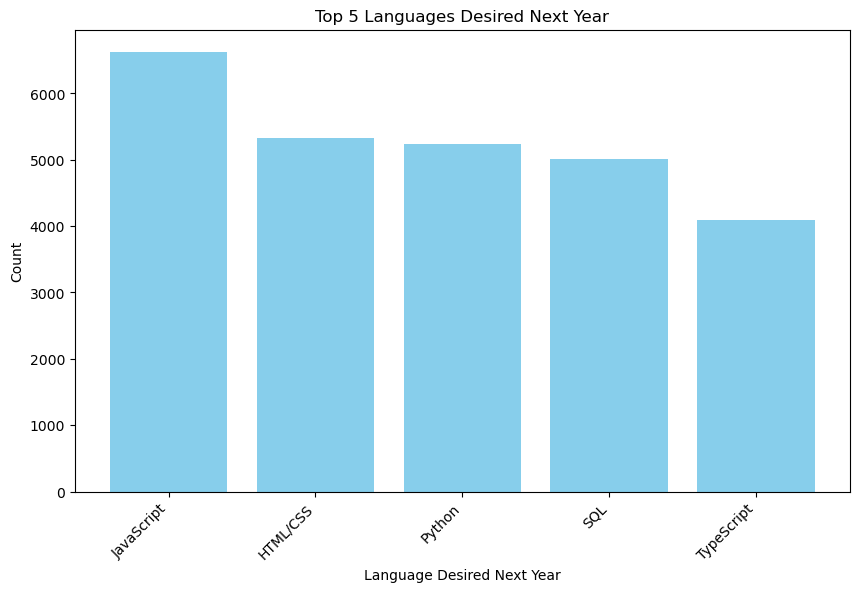

In [57]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['LanguageDesireNextYear'], df['Count'], color='skyblue')
plt.xlabel('Language Desired Next Year')
plt.ylabel('Count')
plt.title('Top 5 Languages Desired Next Year')
plt.xticks(rotation=45, ha='right')
plt.show()


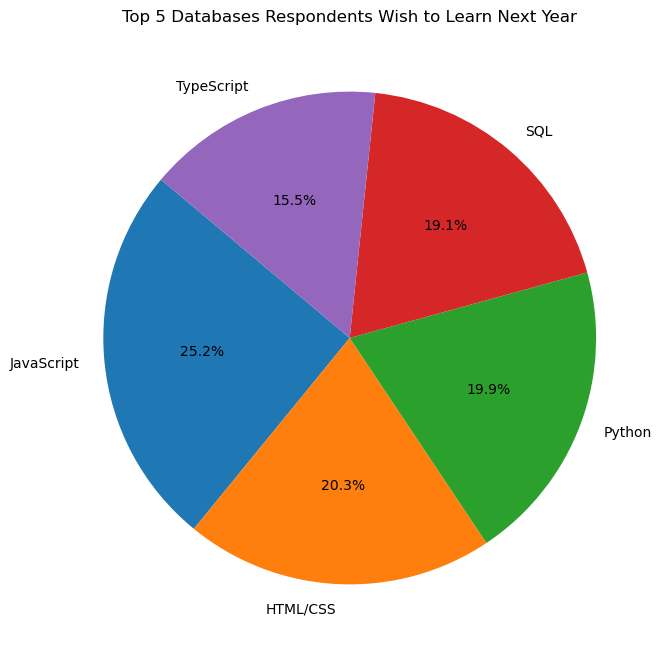

In [48]:
# your code goes here

# Query to get the data
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['LanguageDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Language Respondents Wish to Learn Next Year')
plt.show()

In [27]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
